# Análisis local de la función logística

## Referencias

1. H.G. Schuster, W. Just. **Deterministic chaos: an introduction**. Capítulo 4, secciones 4.1 y 4.2.
2. [`sympy`: define custom functions](https://docs.sympy.org/latest/guides/custom-functions.html#custom-functions).
3. [Sliders in `Python`](https://plotly.com/python/sliders/).

In [10]:
import sympy as sym
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import numpy as np

In [11]:
a,x,y=sym.symbols('a,x,y')

Acá defino el mapeo logístico, pero introduciendo una variable (natural) `n` para calcular la $n$-ésima composición de $f(x)=rx(1-x)$

In [12]:
def logMap(x,a,n):
    assert type(n)==int
    y=a*x*(1-x)
    if n==0:
        return x
    elif n==1:
        return y
    else:
        return logMap(y,a,n-1)

Por ejemplo, para la iteración $f(f(x))=:f^{(2)}(x)$:

In [13]:
y=logMap(x,a,2)

tenemos la expresión polinómica:

In [14]:
y.expand()

-a**3*x**4 + 2*a**3*x**3 - a**3*x**2 - a**2*x**2 + a**2*x

que puede ser evaluada en $(x,a)$:

In [15]:
y.subs({
    'x':0.5,
    'a':1
})

0.187500000000000

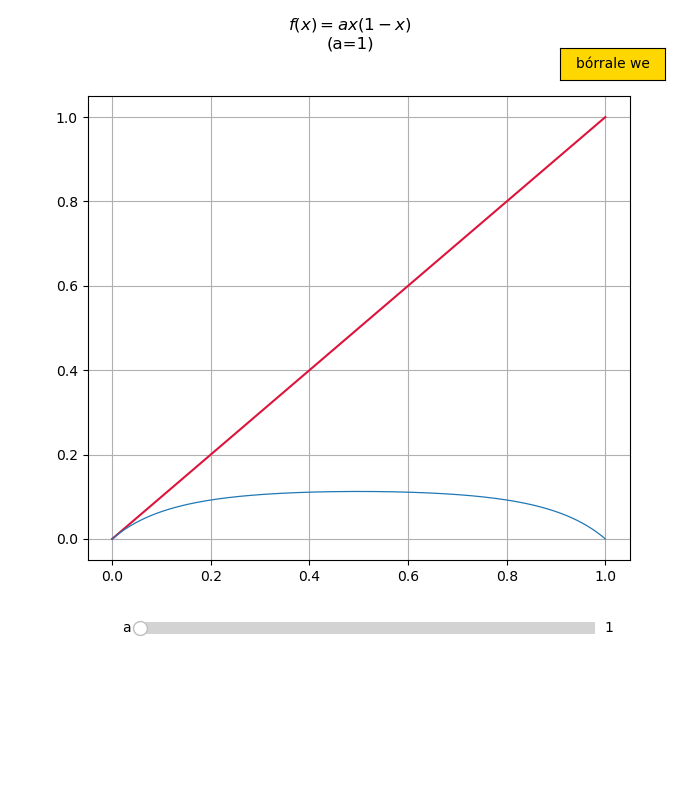

In [19]:
%matplotlib widget

#Número de veces que se compone f
n=5

x0=np.linspace(0,1,1000,endpoint=True)

fig, ax = plt.subplots(figsize=(7,8))
plt.subplots_adjust(bottom=0.3)
fig.suptitle(f'$f(x)=ax(1-x)$\n(a={1})')
ax.grid()

#Grafiquita inicial
ax.plot(x0,x0,c='crimson')
l,=plt.plot(
    x0,
    np.array(
        [logMap(x00,1,n) for x00 in x0] #Evaluación para a=1 y valores de x en x0
    ),
    lw=0.9
)

# 'ax' para el deslizador
axA = plt.axes([0.2, 0.2, 0.65, 0.03])

# Objeto para variar el parámetro a
A = Slider(axA, 'a', 1, 5, 1)

# Función para actualizar la gráfica
def update(val):
    a = A.val
    l.set_ydata(
        np.array(
            [logMap(x00,a,n) for x00 in x0]
        )
    )
    fig.suptitle(f'$f(x)=ax(1-x)$\n(a={a:.3f})')

# Actualizar esta vaina
A.on_changed(update)

resetax = plt.axes([0.8, 0.9, 0.15, 0.04])
button = Button(
    resetax,
    'bórrale we',
    color='gold',
    hovercolor='skyblue'
)


def resetSlider(event):
    A.reset()

button.on_clicked(resetSlider)

plt.show()